In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_idx = "5.1"

meanlist = np.genfromtxt(f"data/{data_idx}/mean_int.csv", delimiter=",")
# lower99list = np.genfromtxt(f"data/{data_idx}/lower99_int.csv")
# upper99list = np.genfromtxt(f"data/{data_idx}/upper99_int.csv")

votes1_mean = np.load(f"data/{data_idx}/votes_diff_input_int_mean.npy")
votes1_lower99 = np.load(f"data/{data_idx}/votes_diff_input_int_lower99.npy")
votes1_upper99 = np.load(f"data/{data_idx}/votes_diff_input_int_upper99.npy")
votes2_mean = np.load(f"data/{data_idx}/votes_same_input_int_mean.npy")
votes2_lower99 = np.load(f"data/{data_idx}/votes_same_input_int_lower99.npy")
votes2_upper99 = np.load(f"data/{data_idx}/votes_same_input_int_upper99.npy")
# votes3_mean = np.load(f"data/{data_idx}/votes_same_input_non_int_mean.npy")
# votes3_lower99 = np.load(f"data/{data_idx}/votes_same_input_non_int_lower99.npy")
# votes3_upper99 = np.load(f"data/{data_idx}/votes_same_input_non_int_upper99.npy")

In [3]:
conv_len = 200

tmp = np.concatenate((np.ones(conv_len//2)*votes1_lower99[0], votes1_lower99, np.ones(conv_len//2-1)*votes1_lower99[-1]))
votes1_lower99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")
tmp = np.concatenate((np.ones(conv_len//2)*votes1_upper99[0], votes1_upper99, np.ones(conv_len//2-1)*votes1_upper99[-1]))
votes1_upper99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")

tmp = np.concatenate((np.ones(conv_len//2)*votes2_lower99[0], votes2_lower99, np.ones(conv_len//2-1)*votes2_lower99[-1]))
votes2_lower99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")
tmp = np.concatenate((np.ones(conv_len//2)*votes2_upper99[0], votes2_upper99, np.ones(conv_len//2-1)*votes2_upper99[-1]))
votes2_upper99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")

# tmp = np.concatenate((np.ones(conv_len//2)*votes3_lower99[0], votes3_lower99, np.ones(conv_len//2-1)*votes3_lower99[-1]))
# votes3_lower99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")
# tmp = np.concatenate((np.ones(conv_len//2)*votes3_upper99[0], votes3_upper99, np.ones(conv_len//2-1)*votes3_upper99[-1]))
# votes3_upper99_conv = np.convolve(tmp, np.ones(conv_len)/conv_len, mode="valid")

In [4]:
steady_start = 20000
theory_spacing = 100

# fp99_1 = np.mean(votes1_upper99[steady_start:])
# fp99_2 = np.mean(votes2_upper99[steady_start:])
fp99_1 = 8
fp99_2 = 8
# fp99_3 = np.mean(votes3_upper99[steady_start:])
# fp99_theory = upper99list[-1]

# capacity_mean_1 = np.argwhere(np.bitwise_and((votes1_mean[:-1] - fp99_1)>0, (votes1_mean[1:] - fp99_1)<=0))[0, 0]
# capacity_mean_2 = np.argwhere(np.bitwise_and((votes2_mean[:-1] - fp99_2)>0, (votes2_mean[1:] - fp99_2)<=0))[0, 0]
capacity_lower_1 = np.mean(np.argwhere(np.bitwise_and((votes1_lower99_conv[:-1] - fp99_1)>0, (votes1_lower99_conv[1:] - fp99_1)<=0)))
capacity_lower_2 = np.mean(np.argwhere(np.bitwise_and((votes2_lower99_conv[:-1] - fp99_2)>0, (votes2_lower99_conv[1:] - fp99_2)<=0)))

In [5]:
print("99% false-positive bound")
print("different input, int: ", fp99_1)
print("same input, int: ", fp99_2)
# print("theory: ", fp99_theory)
# print("false-positive, same input, non-int: ", fp99_same_non_int)
print("difference: ", fp99_2 - fp99_1)

print("")

# print("mean memory capacity")
# print("different input, int: ", capacity_mean_1)
# print("same input, int: ", capacity_mean_2)
# print("difference: ", capacity_mean_1 - capacity_mean_2)

print("")

print("99% lower bound of memory capacity")
print("different input, int: ", capacity_lower_1)
print("same input, int: ", capacity_lower_2)
print("difference: ", capacity_lower_1 - capacity_lower_2)

99% false-positive bound
different input, int:  8
same input, int:  8
difference:  0


99% lower bound of memory capacity
different input, int:  6837.0
same input, int:  6101.0
difference:  736.0


Text(0, 0.5, '# active dendrites')

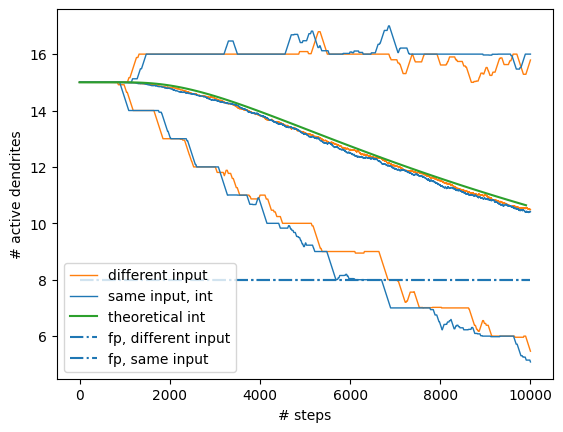

In [6]:
decay_steps = 10000
lwidth = 1.0


plt.plot(votes1_mean, c="#ff7f0e", linewidth=lwidth, label="different input")
plt.plot(votes1_lower99_conv, c="#ff7f0e", linewidth=lwidth)
plt.plot(votes1_upper99_conv, c="#ff7f0e", linewidth=lwidth)

plt.plot(votes2_mean, c="#1f77b4", linewidth=lwidth, label="same input, int")
plt.plot(votes2_lower99_conv, c="#1f77b4", linewidth=lwidth)
plt.plot(votes2_upper99_conv, c="#1f77b4", linewidth=lwidth)

# plt.plot(votes3_mean, c="#d62728", linewidth=lwidth, label="same input, non-int")
# plt.plot(votes3_lower99_conv, c="#d62728", linewidth=lwidth)
# plt.plot(votes3_upper99_conv, c="#d62728", linewidth=lwidth)

# plt.plot(np.arange(0, decay_steps, theory_spacing), meanlist, c="#2ca02c", label="theoretical int")
plt.plot(meanlist[:, 0], meanlist[:, 1], c="#2ca02c", label="theoretical int")
# plt.plot(np.arange(0, decay_steps, 50), lower99list, c="#2ca02c")
# plt.plot(np.arange(0, decay_steps, 50), upper99list, c="#2ca02c")

# plt.plot(np.arange(0, 50000, 50), meanlist_non_int, c="#9467bd", label="theoretical non-int")
# plt.plot(np.arange(0, 50000, 50), lower99list_non_int, c="#9467bd")
# plt.plot(np.arange(0, 50000, 50), upper99list_non_int, c="#9467bd")

plt.hlines(fp99_1, 0, decay_steps, linestyles="dashdot", label="fp, different input")
plt.hlines(fp99_2, 0, decay_steps, linestyles="dashdot", label="fp, same input")

plt.legend()
plt.xlabel("# steps")
plt.ylabel("# active dendrites")

# plt.xlim(0, 2500)
# plt.ylim(10, 12)

In [8]:
votes_diff_input = np.load("data/1/votes_diff_input_int.npy")
votes_same_input = np.load("data/1/votes_same_input_int.npy")
fn_theory_list = np.genfromtxt("data/1/false_negative_theory_int.csv", delimiter=",")

In [9]:
decay_steps=50000

(0.0, 0.5)

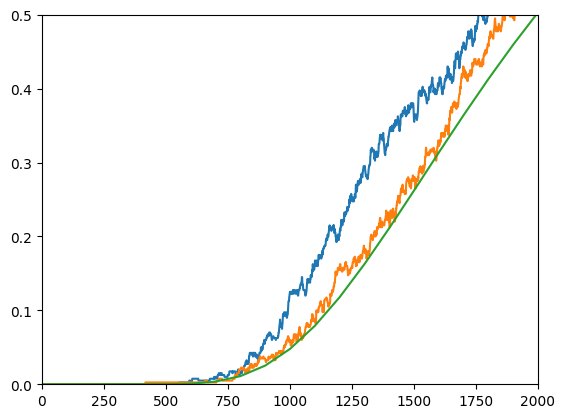

In [13]:
plt.plot(np.mean(votes_same_input <= 8, axis=0)[:decay_steps])
plt.plot(np.mean(votes_diff_input <= 8, axis=0)[:decay_steps])
plt.plot(fn_theory_list[:, 0], fn_theory_list[:, 1])
plt.xlim(0, 2000)
plt.ylim(0, 0.5)

In [11]:
# np.save("data/1/false_negative_same_input_int", np.mean(votes_same_input <= 8, axis=0)[:decay_steps])
# np.save("data/1/false_negative_diff_input_int", np.mean(votes_diff_input <= 8, axis=0)[:decay_steps])

In [9]:
data_idx=5.1
fn_theory_list = np.genfromtxt(f"data/{data_idx}/false_negative_theory_int.csv", delimiter=",")
fn1_list = np.load(f"data/{data_idx}/false_negative_same_input_int.npy")
fn2_list = np.load(f"data/{data_idx}/false_negative_diff_input_int.npy")

Text(0, 0.5, 'false negative probability')

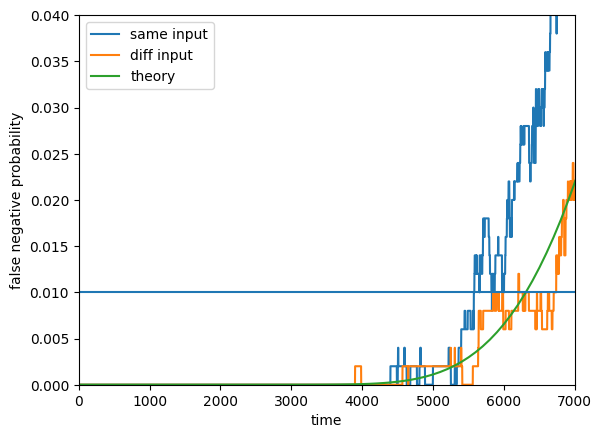

In [13]:
plt.plot(fn1_list, label="same input")
plt.plot(fn2_list, label="diff input")
plt.plot(fn_theory_list[:, 0], fn_theory_list[:, 1], label="theory")
plt.legend()
plt.xlim(0, 7000)
plt.hlines(0.01, 0, 7000)
plt.ylim(0, 0.04)
plt.xlabel("time")
plt.ylabel("false negative probability")

In [37]:
tmp = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300.txt") # dim = (n_combinations*n_repeat, 4)
tmp_theory = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300_theory.txt") # dim = (n_combinations, 4)
tmp_same = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300_int.txt") # dim = (n_combinations*n_repeat, 4)

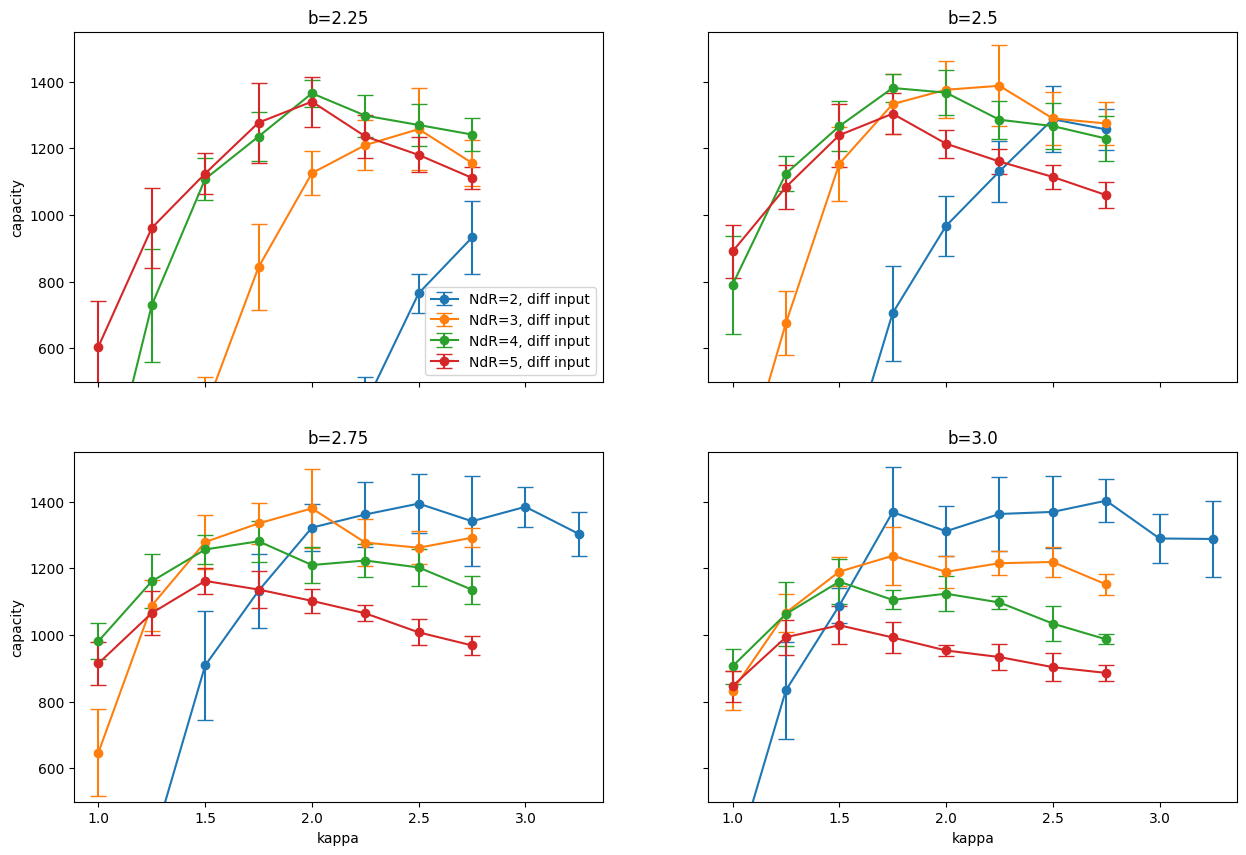

In [39]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))
n_repeat = 6 # number of repetitions for each parameter combination. 
b_list = [2.25, 2.5, 2.75, 3.0]
ndR_list = {2, 3, 4, 5}

for b_idx in range(len(b_list)):
    for ndR_idx, ndR in enumerate(ndR_list):
        if b_idx in {0, 1} and ndR == 1:
            continue
        arg_ndR = np.argwhere(np.bitwise_and(tmp[:, 0]==b_list[b_idx], tmp[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR = tmp[arg_ndR]
        arg_ndR_theory = np.argwhere(np.bitwise_and(tmp_theory[:, 0]==b_list[b_idx], tmp_theory[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_theory = tmp_theory[arg_ndR_theory]
        tmp_ndR_theory = tmp_ndR_theory[np.argsort(tmp_ndR_theory[:, 1], axis=0)]
        tmp_ndR = tmp_ndR.reshape((-1, n_repeat, 4))
        tmp_ndR = tmp_ndR[np.argsort(tmp_ndR[:, 0, 1], axis=0)]
        mean = np.mean(tmp_ndR[:, :, -1], axis=-1)
        stdev = np.std(tmp_ndR[:, :, -1], axis=-1)
        # axes[b_idx//2, b_idx%2].plot(tmp_ndR_theory[:, 1], tmp_ndR_theory[:, -1], marker="o", linestyle="--", c=f"C{ndR_idx}")
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR[:, 0, 1], mean, stdev, fmt="-o", capsize=6, label=f"NdR={ndR}, diff input", c=f"C{ndR_idx}")
        axes[b_idx//2, b_idx%2].set_title(f"b={b_list[b_idx]}")

plt.ylim(500, 1550)
axes[1, 1].set_xlabel("kappa")
axes[1, 0].set_xlabel("kappa")
axes[0, 0].set_ylabel("capacity")
axes[1, 0].set_ylabel("capacity")
axes[0, 0].legend()


In [38]:
6*6*1.5

54.0

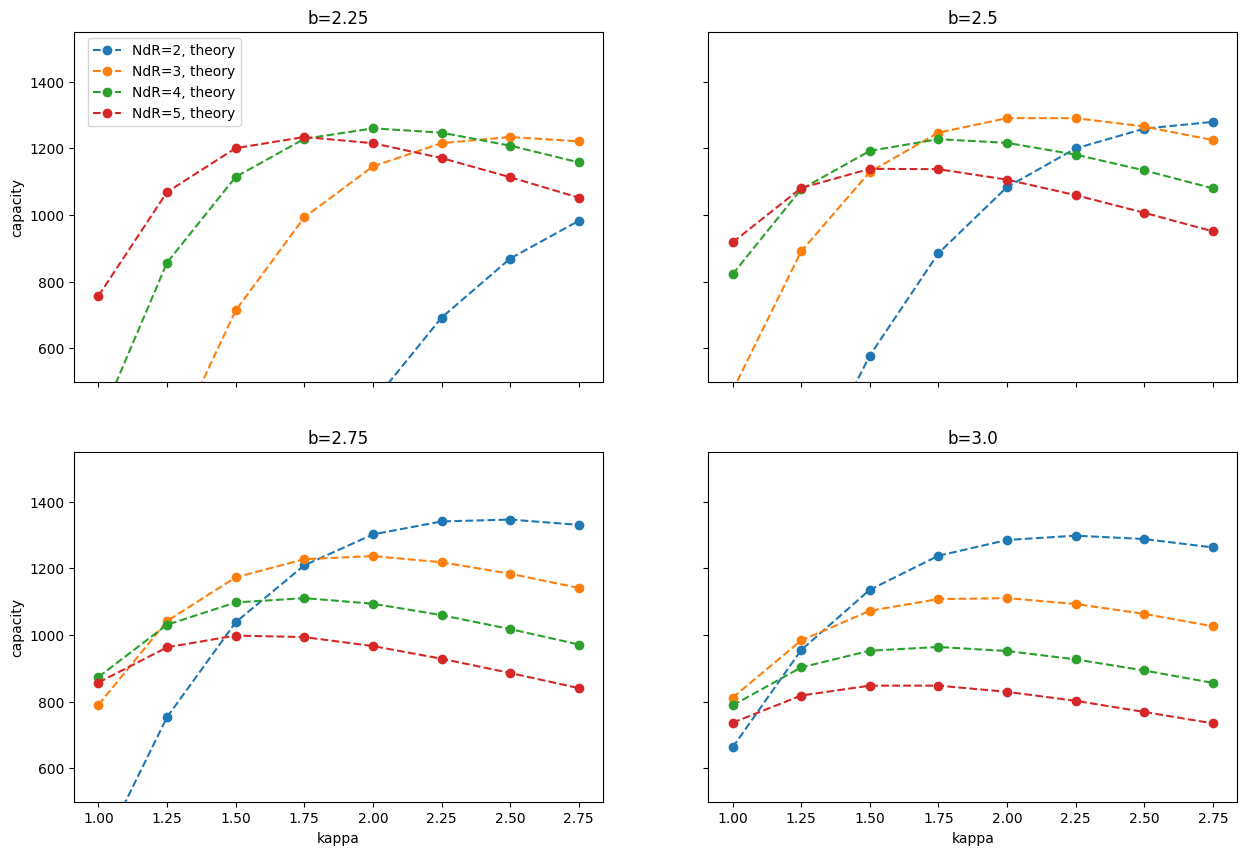

In [42]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))

for b_idx in range(len(b_list)):
    for ndR_idx, ndR in enumerate(ndR_list):
        arg_ndR = np.argwhere(np.bitwise_and(tmp[:, 0]==b_list[b_idx], tmp[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR = tmp[arg_ndR]
        arg_ndR_theory = np.argwhere(np.bitwise_and(tmp_theory[:, 0]==b_list[b_idx], tmp_theory[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_theory = tmp_theory[arg_ndR_theory]
        tmp_ndR_theory = tmp_ndR_theory[np.argsort(tmp_ndR_theory[:, 1], axis=0)]
        tmp_ndR = tmp_ndR.reshape((-1, n_repeat, 4))
        tmp_ndR = tmp_ndR[np.argsort(tmp_ndR[:, 0, 1], axis=0)]
        mean = np.mean(tmp_ndR[:, :, -1], axis=-1)
        stdev = np.std(tmp_ndR[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].plot(tmp_ndR_theory[:, 1], tmp_ndR_theory[:, -1], marker="o", label=f"NdR={ndR}, theory", linestyle="--", c=f"C{ndR_idx}")
        # axes[b_idx//2, b_idx%2].errorbar(tmp_ndR[:, 0, 1], mean, stdev, fmt="-o", capsize=6, label=f"NdR={ndR}")
        axes[b_idx//2, b_idx%2].set_title(f"b={b_list[b_idx]}")

plt.ylim(500, 1550)
axes[1, 1].set_xlabel("kappa")
axes[1, 0].set_xlabel("kappa")
axes[0, 0].set_ylabel("capacity")
axes[1, 0].set_ylabel("capacity")
axes[0, 0].legend(loc=(0.025, 0.73))

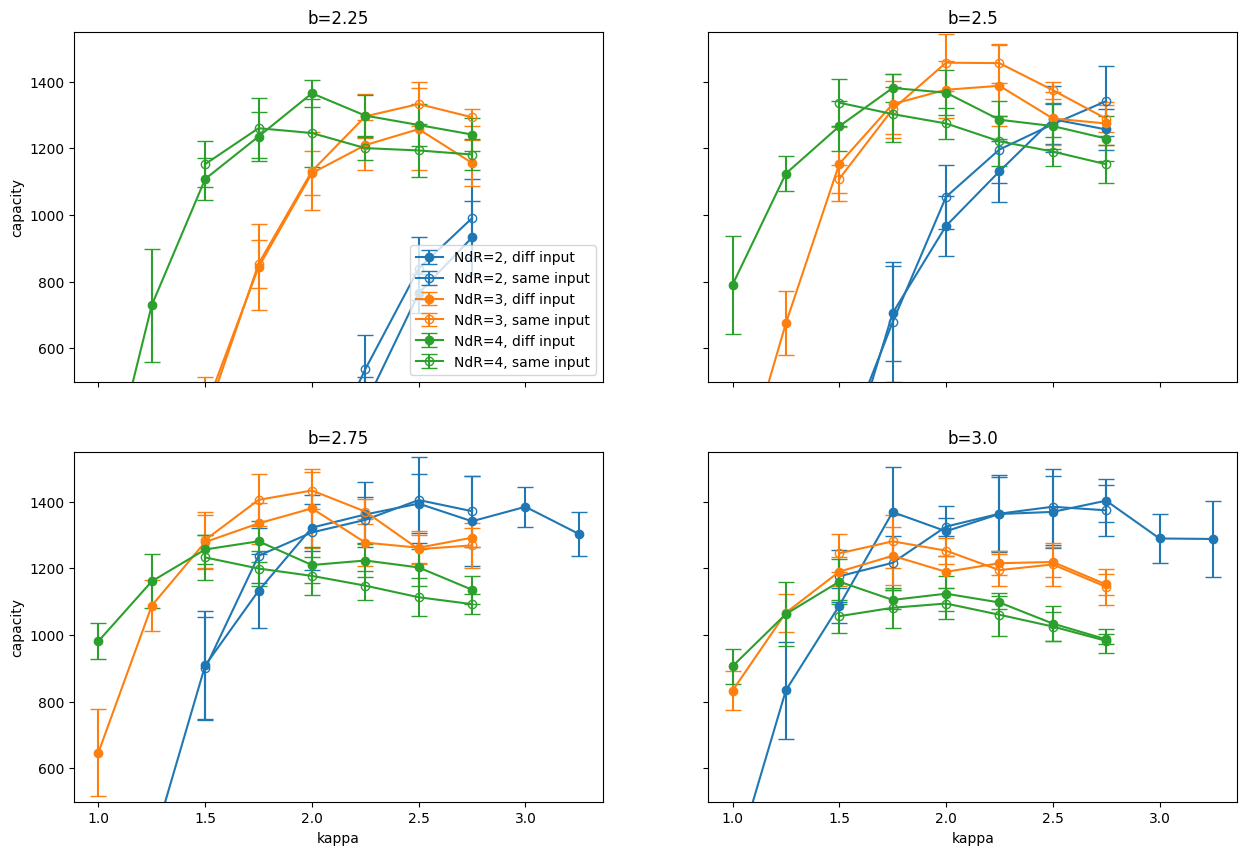

In [38]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))
n_repeat = 6 # number of repetitions for each parameter combination. 
b_list = [2.25, 2.5, 2.75, 3.0]
ndR_list = {2, 3, 4}

for b_idx in range(len(b_list)):
    for ndR_idx, ndR in enumerate(ndR_list):

        arg_ndR = np.argwhere(np.bitwise_and(tmp[:, 0]==b_list[b_idx], tmp[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR = tmp[arg_ndR]
        tmp_ndR = tmp_ndR.reshape((-1, n_repeat, 4))
        tmp_ndR = tmp_ndR[np.argsort(tmp_ndR[:, 0, 1], axis=0)]
        mean = np.mean(tmp_ndR[:, :, -1], axis=-1)
        stdev = np.std(tmp_ndR[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR[:, 0, 1], mean, stdev, fmt="-o", capsize=6, label=f"NdR={ndR}, diff input", c=f"C{ndR_idx}")

        arg_ndR_same = np.argwhere(np.bitwise_and(tmp_same[:, 0]==b_list[b_idx], tmp_same[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_same = tmp_same[arg_ndR_same]
        tmp_ndR_same = tmp_ndR_same.reshape((-1, n_repeat, 4))
        tmp_ndR_same = tmp_ndR_same[np.argsort(tmp_ndR_same[:, 0, 1], axis=0)]
        mean_same = np.mean(tmp_ndR_same[:, :, -1], axis=-1)
        stdev_same = np.std(tmp_ndR_same[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR_same[:, 0, 1], mean_same, stdev_same, fmt="-o", capsize=6, label=f"NdR={ndR}, same input", markerfacecolor='none')

        # arg_ndR_theory = np.argwhere(np.bitwise_and(tmp_theory[:, 0]==b_list[b_idx], tmp_theory[:, 2]==ndR)).reshape((-1, ))
        # tmp_ndR_theory = tmp_theory[arg_ndR_theory]
        # tmp_ndR_theory = tmp_ndR_theory[np.argsort(tmp_ndR_theory[:, 1], axis=0)]
        # axes[b_idx//2, b_idx%2].plot(tmp_ndR_theory[:, 1], tmp_ndR_theory[:, -1], marker="o", linestyle="--", c=f"C{ndR_idx}")

        axes[b_idx//2, b_idx%2].set_title(f"b={b_list[b_idx]}")

plt.ylim(500, 1550)
axes[1, 1].set_xlabel("kappa")
axes[1, 0].set_xlabel("kappa")
axes[0, 0].set_ylabel("capacity")
axes[1, 0].set_ylabel("capacity")
axes[0, 0].legend()

In [49]:
tmp_norm = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300.txt") # dim = (n_combinations*n_repeat, 4)
tmp_decay = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300_neuron10_2.txt") # dim = (n_combinations*n_repeat, 4)
tmp_decay2 = np.genfromtxt("data/paraemter_serach/nd200_ns300/nd200_ns300_neuron_10_2_2.txt") # dim = (n_combinations*n_repeat, 4)

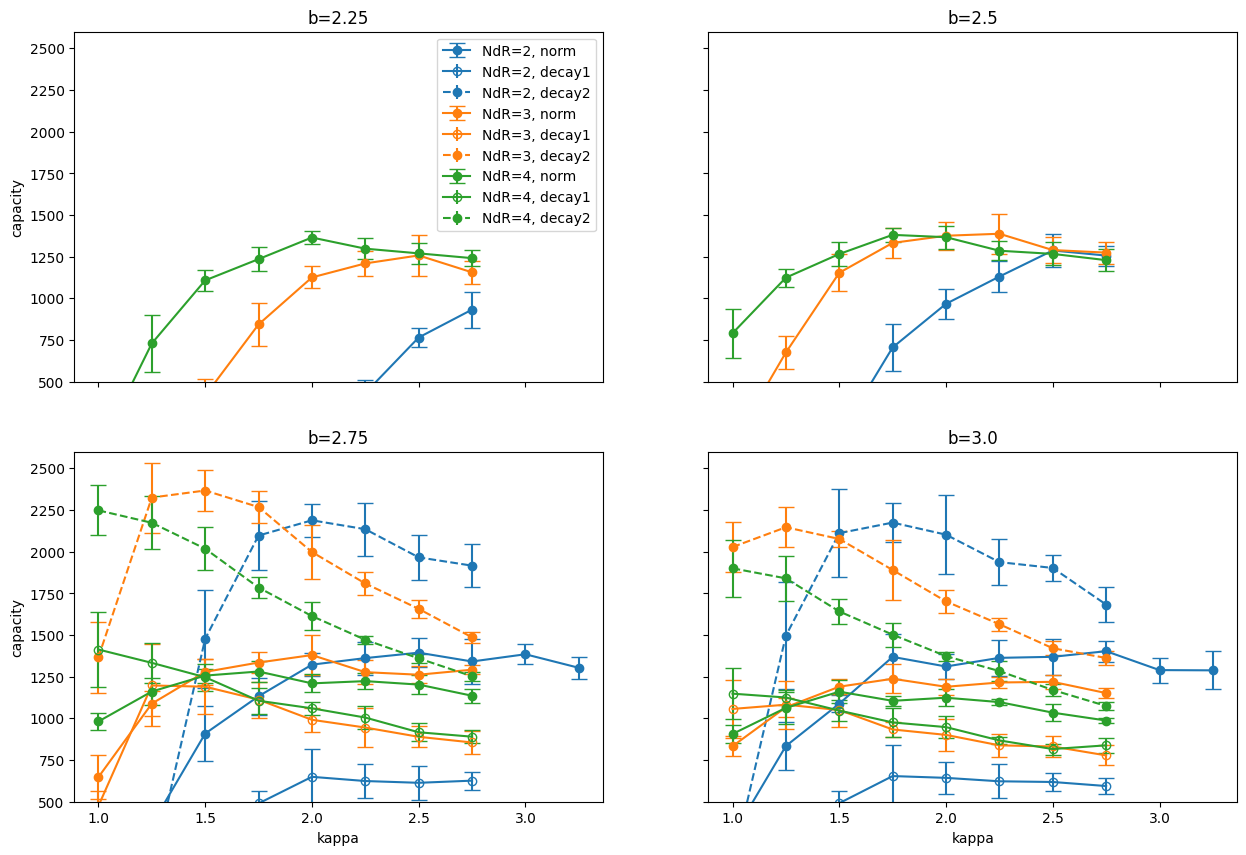

In [52]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15, 10))
n_repeat = 6 # number of repetitions for each parameter combination. 
b_list = [2.25, 2.5, 2.75, 3.0]
ndR_list = {2, 3, 4}

for b_idx in range(len(b_list)):
    for ndR_idx, ndR in enumerate(ndR_list):

        arg_ndR_norm = np.argwhere(np.bitwise_and(tmp_norm[:, 0]==b_list[b_idx], tmp_norm[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_norm = tmp_norm[arg_ndR_norm]
        tmp_ndR_norm = tmp_ndR_norm.reshape((-1, n_repeat, 4))
        tmp_ndR_norm = tmp_ndR_norm[np.argsort(tmp_ndR_norm[:, 0, 1], axis=0)]
        mean_norm = np.mean(tmp_ndR_norm[:, :, -1], axis=-1)
        stdev_norm = np.std(tmp_ndR_norm[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR_norm[:, 0, 1], mean_norm, stdev_norm, fmt="-o", capsize=6, label=f"NdR={ndR}, norm", c=f"C{ndR_idx}")

        arg_ndR_decay = np.argwhere(np.bitwise_and(tmp_decay[:, 0]==b_list[b_idx], tmp_decay[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_decay = tmp_decay[arg_ndR_decay]
        tmp_ndR_decay = tmp_ndR_decay.reshape((-1, n_repeat, 4))
        tmp_ndR_decay = tmp_ndR_decay[np.argsort(tmp_ndR_decay[:, 0, 1], axis=0)]
        mean_decay = np.mean(tmp_ndR_decay[:, :, -1], axis=-1)
        stdev_decay = np.std(tmp_ndR_decay[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR_decay[:, 0, 1], mean_decay, stdev_decay, fmt="-o", capsize=6, label=f"NdR={ndR}, decay1", c=f"C{ndR_idx}", markerfacecolor="none")

        arg_ndR_decay2 = np.argwhere(np.bitwise_and(tmp_decay2[:, 0]==b_list[b_idx], tmp_decay2[:, 2]==ndR)).reshape((-1, ))
        tmp_ndR_decay2 = tmp_decay2[arg_ndR_decay2]
        tmp_ndR_decay2 = tmp_ndR_decay2.reshape((-1, n_repeat, 4))
        tmp_ndR_decay2 = tmp_ndR_decay2[np.argsort(tmp_ndR_decay2[:, 0, 1], axis=0)]
        mean_decay2 = np.mean(tmp_ndR_decay2[:, :, -1], axis=-1)
        stdev_decay2 = np.std(tmp_ndR_decay2[:, :, -1], axis=-1)
        axes[b_idx//2, b_idx%2].errorbar(tmp_ndR_decay2[:, 0, 1], mean_decay2, stdev_decay2, fmt="--o", capsize=6, label=f"NdR={ndR}, decay2", c=f"C{ndR_idx}")

        axes[b_idx//2, b_idx%2].set_title(f"b={b_list[b_idx]}")

plt.ylim(500, 2600)
# plt.xlim(2-0.1, 2.75+0.1)
axes[1, 1].set_xlabel("kappa")
axes[1, 0].set_xlabel("kappa")
axes[0, 0].set_ylabel("capacity")
axes[1, 0].set_ylabel("capacity")
axes[0, 0].legend()